# Tutorial : Feature Construction

Các tác vụ này được thực hiện bằng **transformers**

"transformer" của sklearn được sử dụng cho việc này, các phương thức chính là:

- transformer.fit()
- transformer.transform()
- transformer.fit_transform()

Lưu ý rằng việc phân tích và điều chỉnh (huấn luyện) chỉ dựa trên tập dữ liệu huấn luyện. Sau đó, các phép biến đổi đã học được sẽ được áp dụng cho tập dữ liệu kiểm tra.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the dataset

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Tách biến mục tiêu
X=df[df.columns[1:-1]] # đọc "-1" là "biến cuối cùng"
y=df[df.columns[-1]]

In [4]:
# Hiển thị số lượng phiên bản của mỗi lớp
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
#phân chia dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
#Kiểm tra trước khi chuẩn hóa
X_train.head()

,sepal_width,petal_length,petal_width
98,2.5,3.0,1.1
68,2.2,4.5,1.5
19,3.8,1.5,0.3
143,3.2,5.9,2.3
99,2.8,4.1,1.3


## **PCA**

### Chuẩn hóa Dữ liệu

PCA bị ảnh hưởng bởi thang đo: bạn nên gán cho mỗi đặc trưng trong dữ liệu một thang đo tương tự (trung bình = 0 và phương sai = 1) trước khi áp dụng PCA.
Chúng ta sẽ sử dụng `StandardScaler` để chuẩn hóa các đặc trưng trong tập dữ liệu.

In [7]:
#Bây giờ hãy áp dụng bộ biến đổi "StandardScaler" 1-1
#1) nhập mô-đun
from sklearn.preprocessing import StandardScaler

#2) định nghĩa mô hình
scaler=StandardScaler()

#3) điều chỉnh mô hình
scaler.fit(X_train)

#4) biến đổi dữ liệu
X_train_ss = scaler.transform(X_train)

# Lưu ý 3 và 4 có thể được kết hợp như sau:
# X_train_ss = SS.fit_transform(X_train)

### Run PCA

In [8]:
#Bây giờ hãy thực hiện từ pca
#Các bước tương tự như bộ chuyển đổi tỷ lệ
#1) nhập mô-đun
from sklearn.decomposition import PCA
#2) định nghĩa mô hình
pca = PCA(n_components=2) # n_components nghĩa là phép biến đổi pca xây dựng số lượng đặc trưng này
#3) phù hợp với mô hình
pca.fit(X_train_ss)
#4) biến đổi dữ liệu
pca_train = pca.transform(X_train_ss)
# 3 và 4 có thể được kết hợp
# pca_train = pca.fit_transform(X_train_ss)
# in kết quả đầu ra, là một ma trận chỉ gồm hai đặc trưng
pca_train[:10,:]
# ALT: plt.scatter(pca_train[:,0],pca_train[:,1])

array([[ 0.09953905, -1.27195338],
       [ 1.24517682, -1.511778  ],
       [-2.23995982,  0.82850939],
       [ 1.56980436,  1.02026044],
       [ 0.41457825, -0.43457392],
       [ 1.48337778,  0.51976305],
       [-1.80491446, -0.66531921],
       [-2.2865126 ,  0.80241998],
       [-1.58636569, -1.04325442],
       [ 1.57485976,  0.53649337]])

### Visualising the results



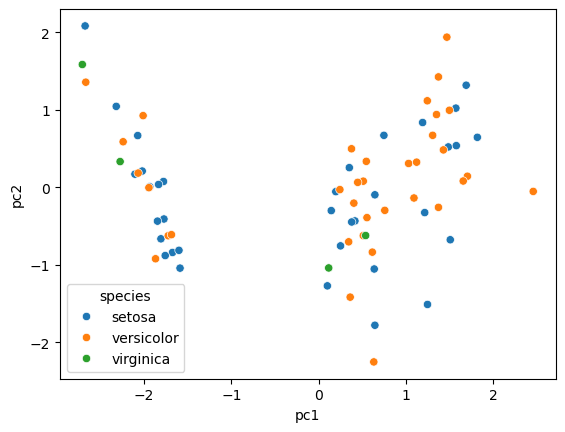

In [9]:
#định dạng và trực quan hóa dữ liệu đào tạo đã chuyển đổi
df_pca_train = pd.DataFrame(data = pca_train, columns = ['pc1', 'pc2'])
df_pca_train['species']=y_train
sns.scatterplot(x='pc1', y='pc2', hue=df_pca_train['species'], data=df_pca_train);

### Biến đổi dữ liệu thử nghiệm

Lưu ý: Ở đây chúng tôi chỉ áp dụng các bộ biến đổi đã học để biến đổi dữ liệu thử nghiệm, KHÔNG sử dụng phép khớp.

In [10]:
#1- Đầu tiên, áp dụng bộ chia tỷ lệ đã được xây dựng dựa trên dữ liệu huấn luyện để chia tỷ lệ dữ liệu kiểm tra
X_test_ss = scaler.transform(X_test)
#2- Thứ hai, áp dụng phép biến đổi pca đã được xây dựng dựa trên dữ liệu huấn luyện để chuyển dữ liệu kiểm tra đã được chia tỷ lệ
pca_test = pca.transform(X_test_ss)

### Classification

In [11]:
# Thực hiện phân loại dựa trên dữ liệu gốc
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
#classifier=SVC()
classifier.fit(X_train, y_train)
score = accuracy_score(classifier.predict(X_test), y_test)
print('Độ chính xác trước khi biến đổi = {:.2f}'.format(score))

Độ chính xác trước khi biến đổi = 0.91


## ICA

Các bước rất giống với bộ chia tỷ lệ và bộ chuyển đổi PCA.

Thực tế, có một số phương pháp ICA. Chúng ta sẽ sử dụng thuật toán `Fast ICA` của sklearn.

In [12]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica_train = ica.fit_transform(X_train_ss) 

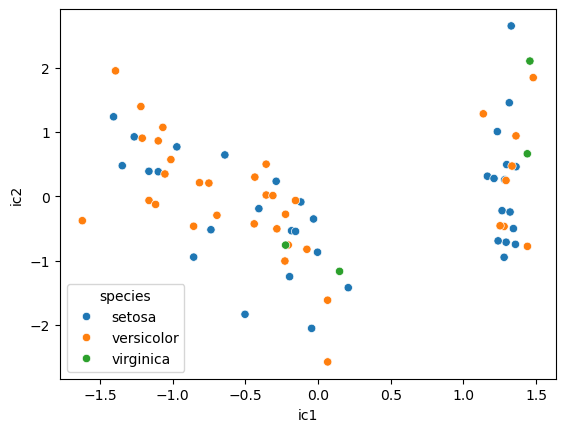

In [13]:
# Visualisation
df_ica_train = pd.DataFrame(data = ica_train, columns = ['ic1', 'ic2'])
df_ica_train['species']=y_train
sns.scatterplot(x='ic1', y='ic2', hue=df_ica_train['species'], data=df_ica_train);

In [14]:
# Thực hiện phân loại bằng dữ liệu đã chuyển đổi dựa trên ica
# Chuyển đổi dữ liệu thử nghiệm bằng ica
classifier.fit(ica_train, y_train)
ica_test = ica.transform(X_test_ss)
score = accuracy_score(classifier.predict(ica_test), y_test)
print('Accuracy after ICA transformation  = {:.2f}'.format(score))

Accuracy after ICA transformation  = 0.91


In [15]:
# Có thể cần phải cài đặt gói cho lập trình di truyền (gp)
!pip install gplearn

Defaulting to user installation because normal site-packages is not writeable


In [29]:
#Since this package does not work when the target variable is string, an encoder is used to convert it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(y_train)
label_encoded

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [ ]:
#Now lets apply genetic programming.
#Steps are similar to the scale, pca, and ica transformers
from gplearn.genetic import SymbolicTransformer
gp = SymbolicTransformer(n_components=2)
gp.fit(X_train_ss, label_encoded)
gp_train = gp.transform(X_train_ss)

In [32]:
pip install scikit-learn==1.5.2

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 6.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 5.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 4.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 3.9 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 4.2 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.0 MB 4.2 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 3.3 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/11.0 MB 3.2 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/11.0 MB 3.3 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 3.3 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.0 MB 3.2 MB/s eta 0:00:02
   --

In [ ]:
# Visualisation using the gp-based transformed data
df_gp_train = pd.DataFrame(data = gp_train, columns = ['gp1', 'gp2'])
df_gp_train['species']=y_train
sns.scatterplot(x='gp1', y='gp2', hue=df_gp_train['species'], data=df_gp_train)

In [ ]:
# Transform test data using gp
# Then, performing classification using the ica-based transformed data
gp_test = gp.transform(X_test_ss)
df_gp_test = pd.DataFrame(data = gp_test, columns = ['gp1', 'gp2'])
df_gp_test['species']=y_test
classifier.fit(gp_train, y_train)
accuracy_score(classifier.predict(gp_test), y_test)